<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Changing-variable-names-for-Tipo_Material_Educativo,-Tipo_Soporte_Actual,-Lengua,-Curso-and-Asignatura" data-toc-modified-id="Changing-variable-names-for-Tipo_Material_Educativo,-Tipo_Soporte_Actual,-Lengua,-Curso-and-Asignatura-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Changing variable names for Tipo_Material_Educativo, Tipo_Soporte_Actual, Lengua, Curso and Asignatura</a></span></li><li><span><a href="#Checking-for-NA's" data-toc-modified-id="Checking-for-NA's-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Checking for NA's</a></span></li><li><span><a href="#Plots-to-see-the-distribution-for-our-categorical-features" data-toc-modified-id="Plots-to-see-the-distribution-for-our-categorical-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plots to see the distribution for our categorical features</a></span></li><li><span><a href="#Checking-for-Outliers" data-toc-modified-id="Checking-for-Outliers-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Checking for Outliers</a></span></li><li><span><a href="#Obtaining-valuable-insights" data-toc-modified-id="Obtaining-valuable-insights-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Obtaining valuable insights</a></span></li><li><span><a href="#Checking-Coordinates" data-toc-modified-id="Checking-Coordinates-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Checking Coordinates</a></span></li></ul></li></ul></div>

# Introduction
For this datathon we didn't have time to merge our two datasets together and still have everything running. Please keep that in mind while going through both of the jupyter notebooks. Please, for you not to waste your time going through this, use this document only to look at the EDA. For the model check our main document called "DATATHONGROUPD". The data preparation part is almost identical in the other document, only difference it has few minor changes that were made after we started the modeling part.

In [6]:
#!pip install pandas_profiling

In [7]:
# Imports
import warnings

warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot
import pandas_profiling

# Data preparation

In [8]:
# Importing the data
CSD2016 = pd.read_csv('CDS_2016_va', encoding = 'latin-1')
CSD2017 = pd.read_csv('CDS_2017_va', encoding = 'latin-1')
CSD2018 = pd.read_csv('CDS_2018_va', encoding = 'latin-1')
CSD2019 = pd.read_csv('CDS_2019_NO_LABEL', encoding = 'latin-1')
clientes = pd.read_csv("Clientes.csv")

In [9]:
# Renaming columns for all dataframes
CSD2016.rename(columns={'Año Natural': 'Año_Natural', 'Tipo Material Educativo': 'Tipo_Material_Educativo', 'Grupo Editorial': 'Grupo_Editorial', 'Tipo Soporte Actual': 'Tipo_Soporte_Actual', 'Variable 1': 'Variable_1', 'Variable 2': 'Variable_2'}, inplace=True)
CSD2019.rename(columns={'Año natural': 'Año_Natural', 'Tipo Material Educativo': 'Tipo_Material_Educativo', 'Grupo Editorial': 'Grupo_Editorial', 'Tipo Soporte Actual': 'Tipo_Soporte_Actual', 'Variable1': 'Variable_1', 'Variable2': 'Variable_2'}, inplace=True)
CSD2017.columns = CSD2016.columns
CSD2018.columns = CSD2016.columns
clientes.rename(columns={'Comunidad Autónoma': 'Comunidad_Autónoma'}, inplace=True)

In [10]:
# Cleaning variables from 2018 dataset containing error
CSD2018["Curso"] = CSD2018["Curso"].str.replace("c","")
CSD2018 = CSD2018.replace({"Año_Natural": 18}, {"Año_Natural": 2018}, regex=True)
CSD2018["Curso"] = CSD2018["Curso"].astype('int64')
CSD2019["Variable_2"] = CSD2019["Variable_2"] * 100

In [11]:
# Creating a unique identifier for each record
CSD2016["Unique_Id"] = (CSD2016["Id_Cliente"].astype(str) + CSD2016["Curso"].astype(str) + CSD2016["Asignatura"].astype(str) + CSD2016["Tipo_Material_Educativo"].astype(str) + CSD2016["Lengua"].astype(str) + CSD2016["Tipo_Soporte_Actual"].astype(str))
CSD2017["Unique_Id"] = (CSD2017["Id_Cliente"].astype(str) + CSD2017["Curso"].astype(str) + CSD2017["Asignatura"].astype(str) + CSD2017["Tipo_Material_Educativo"].astype(str) + CSD2017["Lengua"].astype(str) + CSD2017["Tipo_Soporte_Actual"].astype(str))
CSD2018["Unique_Id"] = (CSD2018["Id_Cliente"].astype(str) + CSD2018["Curso"].astype(str) + CSD2018["Asignatura"].astype(str) + CSD2018["Tipo_Material_Educativo"].astype(str) + CSD2018["Lengua"].astype(str) + CSD2018["Tipo_Soporte_Actual"].astype(str))
CSD2019["Unique_Id"] = (CSD2019["Id_Cliente"].astype(str) + CSD2019["Curso"].astype(str) + CSD2019["Asignatura"].astype(str) + CSD2019["Tipo_Material_Educativo"].astype(str) + CSD2019["Lengua"].astype(str) + CSD2019["Tipo_Soporte_Actual"].astype(str))

In [12]:
# Checking duplicates for 2016
CSD2016.duplicated().sum()

0

In [13]:
# Checking duplicates for 2017
CSD2017.duplicated().sum()

30712

In [14]:
# Checking duplicates for 2018
CSD2018.duplicated().sum()

0

In [15]:
# Checking duplicates for 2019
CSD2019.duplicated().sum()

0

In [16]:
# Dropping duplicates
CSD2017.sort_values("Unique_Id", inplace=True)
CSD2017 = CSD2017.drop_duplicates()

In [17]:
# Changing Grupo_Editiorial to string
CSD2016["Grupo_Editorial"] = CSD2016["Grupo_Editorial"].astype("str")
CSD2017["Grupo_Editorial"] = CSD2017["Grupo_Editorial"].astype("str")
CSD2018["Grupo_Editorial"] = CSD2018["Grupo_Editorial"].astype("str")

In [18]:
#Defining a function to return the number of years
def courseyears(s):
    if (pd.isnull(s["Años_Curso_PY"]) == True):
        return 1
    else:
        return s["Años_Curso_PY"] + 1

In [19]:
# Adding column "Groupo_Editorial" from the previous Year and column containing Number of years of the course
CSD2016["Años_Curso"] = 1

CSD2016_1 = CSD2016[["Unique_Id","Grupo_Editorial","Años_Curso"]]
CSD2016_1.columns = ["Unique_Id","Grupo_Editorial_PY","Años_Curso_PY"]
CSD2017 = pd.merge(CSD2017, CSD2016_1, how = "left", on='Unique_Id')
CSD2017["Años_Curso"] = CSD2017.apply(courseyears, axis=1)
CSD2017 = CSD2017.drop(["Años_Curso_PY"], axis = 1)

CSD2017_1 = CSD2017[["Unique_Id","Grupo_Editorial","Años_Curso"]]
CSD2017_1.columns = ["Unique_Id","Grupo_Editorial_PY","Años_Curso_PY"]
CSD2018 = pd.merge(CSD2018, CSD2017_1,how = "left", on='Unique_Id')
CSD2018["Años_Curso"] = CSD2018.apply(courseyears, axis=1)
CSD2018 = CSD2018.drop(["Años_Curso_PY"], axis = 1)

CSD2018_1 = CSD2018[["Unique_Id","Grupo_Editorial","Años_Curso"]]
CSD2018_1.columns = ["Unique_Id","Grupo_Editorial_PY","Años_Curso_PY"]
CSD2019 = pd.merge(CSD2019, CSD2018_1, how = "left", on='Unique_Id')
CSD2019["Años_Curso"] = CSD2019.apply(courseyears, axis=1)
CSD2019 = CSD2019.drop(["Años_Curso_PY"], axis = 1)

print("Number of courses in 2016: " + CSD2016["Unique_Id"].count().astype(str))
print("Number of courses in 2017: " + CSD2017["Unique_Id"].count().astype(str))
print("Number of courses in 2018: " + CSD2018["Unique_Id"].count().astype(str))
print("Number of courses in 2019: " + CSD2019["Unique_Id"].count().astype(str))

Number of courses in 2016: 612727
Number of courses in 2017: 615630
Number of courses in 2018: 619854
Number of courses in 2019: 617860


In [20]:
# Concatenating the dataframes
AllCDS = pd.concat([CSD2016, CSD2017, CSD2018], axis = 0, join = 'outer', ignore_index = False)
print("Number of courses in All Years: " + AllCDS["Unique_Id"].count().astype(str))

Number of courses in All Years: 1848211


In [21]:
# Defining function to return the type of change from one year to another 
def changes(df):
    if (pd.isnull(df["Grupo_Editorial_PY"]) == True) and (df["Grupo_Editorial"] == "1") :
        return "New_course_SM"
    elif (pd.isnull(df["Grupo_Editorial_PY"]) == True) and (df["Grupo_Editorial"] == "90") :
        return "New_course_No-Use"
    elif (pd.isnull(df["Grupo_Editorial_PY"]) == True) and (df["Grupo_Editorial"] != "1") and (df["Grupo_Editorial"] != "90"):
        return "New_course_Editorial"
    elif (df["Grupo_Editorial_PY"] == "1" ) and (df["Grupo_Editorial"] == "1" ):
        return "SM_to_SM"
    elif (df["Grupo_Editorial_PY"] != "1" ) and (df["Grupo_Editorial_PY"] != "90" ) and (df["Grupo_Editorial"] != "1") and (df["Grupo_Editorial"] != "90"):
        return "Editorial_to_Editorial"
    elif (df["Grupo_Editorial_PY"] == "90" ) and (df["Grupo_Editorial"] == "90"):
        return "No-Use_to_No-Use"
    elif (df["Grupo_Editorial_PY"] == "1" ) and (df["Grupo_Editorial"] != "1" ) and (df["Grupo_Editorial"] != "90" ):
        return "SM_to_Editorial"
    elif (df["Grupo_Editorial_PY"] != "1" ) and (df["Grupo_Editorial"] == "1" ) and (df["Grupo_Editorial"] != "90" ):
        return "Editorial_to_SM"
    elif (df["Grupo_Editorial_PY"] == "90" ) and (df["Grupo_Editorial"] == "1"):
        return "No-Use_to_SM"
    elif (df["Grupo_Editorial_PY"] == "90" ) and (df["Grupo_Editorial"] != "1") and (df["Grupo_Editorial"] != "90"):
        return "No-Use_to_Editorial"
    elif (df["Grupo_Editorial_PY"] == "1" ) and (df["Grupo_Editorial"] == "90"):
        return "SM_to_No-Use"
    elif (df["Grupo_Editorial_PY"] != "1" ) and (df["Grupo_Editorial_PY"] != "90" ) and (df["Grupo_Editorial"] == "90"):
        return "Editorial_to_No-Use"
    else:
        return "FAIL"

In [22]:
# Creating a new column applying the function already created
AllCDS["Change"] = AllCDS.apply(changes, axis=1)

In [23]:
# Listing the changes from one year to another by type
AllCDS["Change"].value_counts()

Editorial_to_Editorial    572905
New_course_Editorial      478953
No-Use_to_No-Use          291535
New_course_No-Use         228419
SM_to_SM                  105810
New_course_SM             105106
Editorial_to_No-Use        33053
No-Use_to_Editorial        14240
SM_to_No-Use                6926
Editorial_to_SM             5966
SM_to_Editorial             5298
Name: Change, dtype: int64

When looking all years we can observe: 
- 30% of the courses reimain using educational material from one year to another from editorials that are not SM. 
- 25% of the courses are new courses that use material from other editorials. 
- 15% of the courses have not use any material for at least two consequtive years (considering the present year).
- 12% are **new courses that do not use any material.** 
- When **strictly looking the change "To No Use",** only 2.16% of the courses are in that category, **where SM represent the 0.3% of that total.**

**Because of that, for the target variable we are going to define the change "To No-Use" including:**
- Courses with no use of any material for two consequtive years.
- New courses that did not decide to use any material.
The above because capturing those courses implies to capture a business oportunity for SM.

In [24]:
# Defining a function to return the name of the "Grupo_Editorial"
def grupoeditorialnames(df):
    if (pd.isnull(df["Grupo_Editorial_PY"]) == True):
        return "New_Course"
    elif (df["Grupo_Editorial_PY"] == "1"):
        return "SM"
    elif (df["Grupo_Editorial_PY"] == "90"):
        return "No-Use"
    else:
        return "Editorial"

In [25]:
# Applying the function to both dataframes and creating a new column with the names of the "Grupo_Editorial"
AllCDS["Grupo_Editorial_Nombre"] = AllCDS.apply(grupoeditorialnames, axis=1)
CSD2019["Grupo_Editorial_Nombre"] = CSD2019.apply(grupoeditorialnames, axis=1)

In [26]:
AllCDS["Grupo_Editorial_Nombre"].value_counts()

New_Course    812478
Editorial     609924
No-Use        307775
SM            118034
Name: Grupo_Editorial_Nombre, dtype: int64

In [27]:
CSD2019["Grupo_Editorial_Nombre"].value_counts()

Editorial     304421
No-Use        178203
New_Course     81022
SM             54214
Name: Grupo_Editorial_Nombre, dtype: int64

In [28]:
# Defining the function to return 1 or 0 in the target variable according to the type of change
def targetvariable(df):
    if (df["Change"]) in {"No-Use_to_No-Use","SM_to_No-Use ","Editorial_to_No-Use", "New_course_No-Use"}:
        return 1
    else:
        return 0

In [29]:
# Applying the function to create the target variable
AllCDS["Target"] = AllCDS.apply(targetvariable, axis=1)

In [30]:
# Checking the change to no-use for 2017
AllCDS[AllCDS["Año_Natural"] == 2017]["Target"].value_counts()

0    433324
1    182306
Name: Target, dtype: int64

In [31]:
# Checking the change to no-use for 2018
AllCDS[AllCDS["Año_Natural"] == 2018]["Target"].value_counts()

0    421774
1    198080
Name: Target, dtype: int64

In [32]:
# Merging the dataframes to add information of the schools
AllData = pd.merge(AllCDS, clientes, on="Id_Cliente", how = "left")
AllCSD2019 = pd.merge(CSD2019, clientes, on="Id_Cliente", how = "left")

In [33]:
# Reordering columns
AllData = AllData[['Unique_Id','Id_Cliente', 'Año_Natural', 'Años_Curso','Curso','Asignatura','Tipo_Material_Educativo','Lengua','Tipo_Soporte_Actual', 'Variable_1','Variable_2','Latitud','Longitud', 'Comunidad_Autónoma', 'Id_Asociación', 'Id_Subasociación', 'Titularidad', 'Grupo_Editorial','Grupo_Editorial_PY', 'Grupo_Editorial_Nombre', 'Change','Target']]
AllCSD2019 = AllCSD2019[['Unique_Id','Id_Cliente', 'Año_Natural','Años_Curso','Curso','Asignatura','Tipo_Material_Educativo','Lengua','Tipo_Soporte_Actual', 'Variable_1','Variable_2','Latitud','Longitud', 'Comunidad_Autónoma', 'Id_Asociación', 'Id_Subasociación', 'Titularidad','Grupo_Editorial_PY', 'Grupo_Editorial_Nombre']]

# EDA

In [34]:
#Checking the final dataframe
AllData.sample(5)

,Unique_Id,Id_Cliente,Año_Natural,Años_Curso,Curso,Asignatura,Tipo_Material_Educativo,Lengua,Tipo_Soporte_Actual,Variable_1,...,Longitud,Comunidad_Autónoma,Id_Asociación,Id_Subasociación,Titularidad,Grupo_Editorial,Grupo_Editorial_PY,Grupo_Editorial_Nombre,Change,Target
1348910,12709533371131,127095,2018,2.0,33,37,1,13,1,129.0,...,-1.626615,Navarra,133.0,48.0,Católico,1,1,SM,SM_to_SM,0
580743,20016426542131,200164,2016,1.0,26,54,2,13,1,42.0,...,-0.430921,Comunidad Valenciana,572.0,109.0,Privado,2,NaN,New_Course,New_course_Editorial,0
223831,13650935221131,136509,2016,1.0,35,22,1,13,1,8.0,...,-3.277300,Madrid,NaN,NaN,Privado,16,NaN,New_Course,New_course_Editorial,0
1629505,17026237261101,170262,2018,1.0,37,26,1,10,1,5.0,...,0.558196,Cataluña,597.0,109.0,Privado,9,NaN,New_Course,New_course_Editorial,0
1246364,11471031481131,114710,2018,3.0,31,48,1,13,1,15.0,...,-0.498327,Comunidad Valenciana,85.0,128.0,Católico,90,90,No-Use,No-Use_to_No-Use,1


In [35]:
# Checking what type each feature is
AllData.dtypes

Unique_Id                   object
Id_Cliente                   int64
Año_Natural                  int64
Años_Curso                 float64
Curso                        int64
Asignatura                   int64
Tipo_Material_Educativo      int64
Lengua                       int64
Tipo_Soporte_Actual          int64
Variable_1                 float64
Variable_2                 float64
Latitud                    float64
Longitud                   float64
Comunidad_Autónoma          object
Id_Asociación              float64
Id_Subasociación           float64
Titularidad                 object
Grupo_Editorial             object
Grupo_Editorial_PY          object
Grupo_Editorial_Nombre      object
Change                      object
Target                       int64
dtype: object

In [36]:
# Checking what type each feature is
AllCSD2019.dtypes

Unique_Id                   object
Id_Cliente                   int64
Año_Natural                  int64
Años_Curso                 float64
Curso                        int64
Asignatura                   int64
Tipo_Material_Educativo      int64
Lengua                       int64
Tipo_Soporte_Actual          int64
Variable_1                 float64
Variable_2                 float64
Latitud                    float64
Longitud                   float64
Comunidad_Autónoma          object
Id_Asociación              float64
Id_Subasociación           float64
Titularidad                 object
Grupo_Editorial_PY          object
Grupo_Editorial_Nombre      object
dtype: object

In [37]:
# Changing the following features to categorical for both dataframes
AllData["Id_Cliente"] = AllData["Id_Cliente"].astype(str)
AllData["Id_Asociación"] = AllData["Id_Asociación"].astype(str)
AllData["Id_Subasociación"] = AllData["Id_Subasociación"].astype(str)
AllData["Latitud"] = AllData["Latitud"].astype(float)
AllData["Longitud"] = AllData["Longitud"].astype(float)
AllData["Años_Curso"] = AllData["Años_Curso"].astype(int)
AllCSD2019["Id_Cliente"] = AllCSD2019["Id_Cliente"].astype(str)
AllCSD2019["Id_Asociación"] = AllCSD2019["Id_Asociación"].astype(str)
AllCSD2019["Id_Subasociación"] = AllCSD2019["Id_Subasociación"].astype(str)
AllCSD2019["Latitud"] = AllCSD2019["Latitud"].astype(float)
AllCSD2019["Longitud"] = AllCSD2019["Longitud"].astype(float)
AllCSD2019["Años_Curso"] = AllCSD2019["Años_Curso"].astype(int)

In [38]:
AllCSD2019["Lengua"].unique()

array([13, 26, 18, 10,  0])

## Changing variable names for Tipo_Material_Educativo, Tipo_Soporte_Actual, Lengua, Curso and Asignatura

In [39]:
AllData["Tipo_Material_Educativo"] = AllData["Tipo_Material_Educativo"].map({1: "Básico", 
                                                                             2: "Complementario", 
                                                                             3: "Cuaderno_asociado", 
                                                                             4: "Prescribible"})

AllData["Tipo_Soporte_Actual"] = AllData["Tipo_Soporte_Actual"].map({1: "Papel", 
                                                                     2: "Digital",
                                                                     3: "Papel_digital",
                                                                     4: "Plataforma"})

AllData["Lengua"] = AllData["Lengua"].map({10: "Catalán", 
                                           11: "Gallego",
                                           13: "Castellano",
                                           18: "Valenciano",
                                           26: "Euskera",
                                           0: "Unknown"})

AllData["Curso"] = AllData["Curso"].map({20: "0_años",
                                           21: "1_año",
                                           22: "2_años",
                                           23: "3_años",
                                           24: "4_años",
                                           25: "5_años",
                                           26: "1_Primaria",
                                           27: "2_Primaria",
                                           28: "3_Primaria",
                                           29: "4_Primaria",
                                           30: "5_Primaria",
                                           31: "6_Primaria",
                                           32: "1_Secundaria",
                                           33: "2_Secundaria",
                                           34: "3_Secundaria",
                                           35: "4_Secundaria",
                                           36: "1_Bachillerato",
                                           37: "2_Bachillerato"})

AllData["Asignatura"] = AllData["Asignatura"].map({1: "Aprendizajes_Básicos",
                                                   4: "Atlas_Escolares",
                                                   7: "Biología",
                                                   8: "Biología_y_Geología",
                                                   9: "C_A_B",
                                                   12: "Ciencia_Tecnología_y_Sociedad",
                                                   13: "Ciencias_de_la_Naturaleza",
                                                   14: "Ciencias_para_el_Mundo_Contemp",
                                                   15: "Ciencias_Sociales",
                                                   16: "Comprensión_Lectora",
                                                   18: "Conocimiento_del_Medio",
                                                   19: "Conocimiento_del_Medio_Natural",
                                                   20: "Conocimiento_del_Medio_Social",
                                                   21: "Conviure",
                                                   22: "Cultura_Clásica",
                                                   24: "Dibujo_Técnico",
                                                   25: "Diccionarios_Escolares",
                                                   26: "Economía",
                                                   29: "Educación_para_la_Ciudadanía",
                                                   34: "Ética",
                                                   35: "Filosofía",
                                                   36: "Física",
                                                   37: "Física_y_Química",
                                                   38: "Francés",
                                                   39: "Geografía",
                                                   40: "Geografía_e_Historia",
                                                   41: "Grafomotricidad",
                                                   42: "Griego",
                                                   43: "Historia",
                                                   45: "Historia_del_Arte",
                                                   47: "Informática",
                                                   48: "Inglés",
                                                   50: "Latín",
                                                   51: "Lectoescritura",
                                                   52: "Lecturas",
                                                   53: "Lengua_Autonómica",
                                                   54: "Lengua_Castellana",
                                                   60: "Matemáticas",
                                                   61: "Matemáticas(Ciencias_Naturale)",
                                                   62: "Matemáticas(Ciencias_Sociales)",
                                                   63: "Áreas_Integradas",
                                                   65: "Música",
                                                   68: "Ortografía",
                                                   70: "PAI",
                                                   71: "PAM",
                                                   72: "Plan_Lector",
                                                   73: "Plástica",
                                                   78: "Química",
                                                   79: "Religión",
                                                   81: "Sociedad_Cultura_y_Religión",
                                                   82: "Tecnología",
                                                   83: "Tutoría",
                                                   84: "Vacaciones",
                                                   85: "Biblias_Escolares",
                                                   87: "Competencias_Básicas",
                                                   88: "Educación_Emocional",
                                                   89: "Ciencias_de_la_Tierra_y_Medio",
                                                   90: "Tecnologías_de_la_Información",
                                                   227: "Diver_Curricular(Social)",
                                                   228: "Escritura",
                                                   229: "Science",
                                                   230: "Arts_and_Crafts",
                                                   235: "Agenda",
                                                   236: "Music",
                                                   237: "Visual_Arts",
                                                   238: "Social_Science",
                                                   239: "Natural_Science",
                                                   241: "Tecnologia_Industrial",
                                                   242: "Diver_Curricular(Tecno)",
                                                   243: "Alternativa_Religión",
                                                   246: "Literatura",
                                                   249: "Materias_artísticas",
                                                   259: "Proyectos",
                                                   262: "Geography_and_History",
                                                   263: "Biology_and_Geology",
                                                   265: "Valores_Sociales_y_Cívicos",
                                                   266: "Sciences_Naturelles",
                                                   267: "Sciences_Sociales",
                                                   269: "Cultura_Científica",
                                                   270: "Educación_Física",
                                                   271: "Physical_Education",
                                                   272: "Inteligencias_Múltiples",
                                                   274: "Publicaciones_Generales",
                                                   275:"Unknown",
                                                   276: "Áreas_Integradas_Unidades_Te",
                                                   277: "Tecnology",
                                                   278: "Pastoral",
                                                   279: "PMAR(Técnico)",
                                                   280: "PMAR(Social)",
                                                   292: "Plan_Lector_Loran",
                                                   293: "App",
                                                   298: "Áreas_Integradas_Bilingüe",
                                                   299: "Proyectos_Bilingüe",
                                                   900:"Unknown"})

In [40]:
AllCSD2019["Tipo_Material_Educativo"] = AllCSD2019["Tipo_Material_Educativo"].map({1: "Básico", 
                                                                             2: "Complementario", 
                                                                             3: "Cuaderno_asociado", 
                                                                             4: "Prescribible"})

AllCSD2019["Tipo_Soporte_Actual"] = AllCSD2019["Tipo_Soporte_Actual"].map({1: "Papel", 
                                                                     2: "Digital",
                                                                     3: "Papel_digital",
                                                                     4: "Plataforma"})

AllCSD2019["Lengua"] = AllCSD2019["Lengua"].map({10: "Catalán", 
                                           11: "Gallego",
                                           13: "Castellano",
                                           18: "Valenciano",
                                           26: "Euskera",
                                           0: "Unknown"})

AllCSD2019["Curso"] = AllCSD2019["Curso"].map({20: "0_años",
                                           21: "1_año",
                                           22: "2_años",
                                           23: "3_años",
                                           24: "4_años",
                                           25: "5_años",
                                           26: "1_Primaria",
                                           27: "2_Primaria",
                                           28: "3_Primaria",
                                           29: "4_Primaria",
                                           30: "5_Primaria",
                                           31: "6_Primaria",
                                           32: "1_Secundaria",
                                           33: "2_Secundaria",
                                           34: "3_Secundaria",
                                           35: "4_Secundaria",
                                           36: "1_Bachillerato",
                                           37: "2_Bachillerato"})

AllCSD2019["Asignatura"] = AllCSD2019["Asignatura"].map({1: "Aprendizajes_Básicos",
                                                   4: "Atlas_Escolares",
                                                   7: "Biología",
                                                   8: "Biología_y_Geología",
                                                   9: "C_A_B",
                                                   12: "Ciencia_Tecnología_y_Sociedad",
                                                   13: "Ciencias_de_la_Naturaleza",
                                                   14: "Ciencias_para_el_Mundo_Contemp",
                                                   15: "Ciencias_Sociales",
                                                   16: "Comprensión_Lectora",
                                                   18: "Conocimiento_del_Medio",
                                                   19: "Conocimiento_del_Medio_Natural",
                                                   20: "Conocimiento_del_Medio_Social",
                                                   21: "Conviure",
                                                   22: "Cultura_Clásica",
                                                   24: "Dibujo_Técnico",
                                                   25: "Diccionarios_Escolares",
                                                   26: "Economía",
                                                   29: "Educación_para_la_Ciudadanía",
                                                   34: "Ética",
                                                   35: "Filosofía",
                                                   36: "Física",
                                                   37: "Física_y_Química",
                                                   38: "Francés",
                                                   39: "Geografía",
                                                   40: "Geografía_e_Historia",
                                                   41: "Grafomotricidad",
                                                   42: "Griego",
                                                   43: "Historia",
                                                   45: "Historia_del_Arte",
                                                   47: "Informática",
                                                   48: "Inglés",
                                                   50: "Latín",
                                                   51: "Lectoescritura",
                                                   52: "Lecturas",
                                                   53: "Lengua_Autonómica",
                                                   54: "Lengua_Castellana",
                                                   60: "Matemáticas",
                                                   61: "Matemáticas(Ciencias_Naturale)",
                                                   62: "Matemáticas(Ciencias_Sociales)",
                                                   63: "Áreas_Integradas",
                                                   65: "Música",
                                                   68: "Ortografía",
                                                   70: "PAI",
                                                   71: "PAM",
                                                   72: "Plan_Lector",
                                                   73: "Plástica",
                                                   78: "Química",
                                                   79: "Religión",
                                                   81: "Sociedad_Cultura_y_Religión",
                                                   82: "Tecnología",
                                                   83: "Tutoría",
                                                   84: "Vacaciones",
                                                   85: "Biblias_Escolares",
                                                   87: "Competencias_Básicas",
                                                   88: "Educación_Emocional",
                                                   89: "Ciencias_de_la_Tierra_y_Medio",
                                                   90: "Tecnologías_de_la_Información",
                                                   227: "Diver_Curricular(Social)",
                                                   228: "Escritura",
                                                   229: "Science",
                                                   230: "Arts_and_Crafts",
                                                   235: "Agenda",
                                                   236: "Music",
                                                   237: "Visual_Arts",
                                                   238: "Social_Science",
                                                   239: "Natural_Science",
                                                   241: "Tecnologia_Industrial",
                                                   242: "Diver_Curricular(Tecno)",
                                                   243: "Alternativa_Religión",
                                                   246: "Literatura",
                                                   249: "Materias_artísticas",
                                                   259: "Proyectos",
                                                   262: "Geography_and_History",
                                                   263: "Biology_and_Geology",
                                                   265: "Valores_Sociales_y_Cívicos",
                                                   266: "Sciences_Naturelles",
                                                   267: "Sciences_Sociales",
                                                   269: "Cultura_Científica",
                                                   270: "Educación_Física",
                                                   271: "Physical_Education",
                                                   272: "Inteligencias_Múltiples",
                                                   274: "Publicaciones_Generales",
                                                   275:"Unknown",
                                                   276: "Áreas_Integradas_Unidades_Te",
                                                   277: "Tecnology",
                                                   278: "Pastoral",
                                                   279: "PMAR(Técnico)",
                                                   280: "PMAR(Social)",
                                                   292: "Plan_Lector_Loran",
                                                   293: "App",
                                                   298: "Áreas_Integradas_Bilingüe",
                                                   299: "Proyectos_Bilingüe",
                                                   900:"Unknown"})

In [41]:
AllData.sample(5)

,Unique_Id,Id_Cliente,Año_Natural,Años_Curso,Curso,Asignatura,Tipo_Material_Educativo,Lengua,Tipo_Soporte_Actual,Variable_1,...,Longitud,Comunidad_Autónoma,Id_Asociación,Id_Subasociación,Titularidad,Grupo_Editorial,Grupo_Editorial_PY,Grupo_Editorial_Nombre,Change,Target
1824234,20641331481131,206413,2018,2,6_Primaria,Inglés,Básico,Castellano,Papel,25.0,...,2.027149,Cataluña,nan,nan,Público,4,4,Editorial,Editorial_to_Editorial,0
1172307,19256029481131,192560,2017,2,4_Primaria,Inglés,Básico,Castellano,Papel,25.0,...,-2.698706,País Vasco,nan,nan,Público,10,10,Editorial,Editorial_to_Editorial,0
1111396,17465932543131,174659,2017,2,1_Secundaria,Lengua_Castellana,Cuaderno_asociado,Castellano,Papel,134.0,...,1.957909,Cataluña,nan,nan,Público,18,18,Editorial,Editorial_to_Editorial,0
587585,203209272744131,203209,2016,1,2_Primaria,Publicaciones_Generales,Prescribible,Castellano,Papel,125.0,...,-3.706616,Madrid,614.0,109.0,Privado,1,NaN,New_Course,New_course_SM,0
1223160,21013830483131,210138,2017,1,5_Primaria,Inglés,Cuaderno_asociado,Castellano,Papel,27.0,...,-0.432980,Comunidad Valenciana,nan,nan,Católico,20,NaN,New_Course,New_course_Editorial,0


In [42]:
AllCSD2019.sample(5)

,Unique_Id,Id_Cliente,Año_Natural,Años_Curso,Curso,Asignatura,Tipo_Material_Educativo,Lengua,Tipo_Soporte_Actual,Variable_1,Variable_2,Latitud,Longitud,Comunidad_Autónoma,Id_Asociación,Id_Subasociación,Titularidad,Grupo_Editorial_PY,Grupo_Editorial_Nombre
382932,1692933281131,169293,2019,4,1_Secundaria,Biología_y_Geología,Básico,Castellano,Papel,25.0,677.00,38.360037,-0.468935,Comunidad Valenciana,nan,nan,Privado,4,Editorial
509263,17659035481131,176590,2019,4,4_Secundaria,Inglés,Básico,Castellano,Papel,50.0,1394.00,40.387962,-3.732976,Madrid,nan,nan,Público,4,Editorial
345447,16714136611181,167141,2019,4,1_Bachillerato,Matemáticas(Ciencias_Naturale),Básico,Valenciano,Papel,20.0,707.20,39.366229,-0.454734,Comunidad Valenciana,nan,nan,Público,2,Editorial
604158,20952537621101,209525,2019,4,2_Bachillerato,Matemáticas(Ciencias_Sociales),Básico,Catalán,Papel,11.0,301.18,41.396444,2.163556,Cataluña,nan,nan,Católico,5,Editorial
378237,16905829541131,169058,2019,4,4_Primaria,Lengua_Castellana,Básico,Castellano,Papel,4.0,105.76,42.367877,-2.809217,La Rioja,nan,nan,Público,2,Editorial


In [43]:
# Getting advanced report for all sorts of wanted information about the data
#AllData.profile_report()

In [44]:
# Getting advanced report for all sorts of wanted information about the data
#AllCSD2019.profile_report()

In [45]:
# Checking the size of the dataframe
AllData.shape

(1848211, 22)

In [46]:
# Creating a pivot table to see changes from year to year
pd.pivot_table(AllData, values='Unique_Id', index=['Change'],
               columns=['Año_Natural'], aggfunc= "count", fill_value=0)

Año_Natural,2016,2017,2018
Change,,,
Editorial_to_Editorial,0,286545,286360
Editorial_to_No-Use,0,17570,15483
Editorial_to_SM,0,3051,2915
New_course_Editorial,364326,60701,53926
New_course_No-Use,172621,26463,29335
New_course_SM,75780,15101,14225
No-Use_to_Editorial,0,7614,6626
No-Use_to_No-Use,0,138273,153262
SM_to_Editorial,0,2237,3061


In [47]:
# Checking number of unique id's for each autonomous region (OBS! Some unique id's are counted thrice)
AllData.groupby(["Comunidad_Autónoma"])["Unique_Id"].count().sort_values(ascending = False)

Comunidad_Autónoma
Cataluña                534415
Comunidad Valenciana    475411
Madrid                  415047
Islas Canarias          171939
País Vasco              168297
Navarra                  57045
La Rioja                 26057
Name: Unique_Id, dtype: int64

In [69]:
# EDIT: This code would have solved it
df1 = AllData.drop_duplicates(['Comunidad_Autónoma','Unique_Id']).groupby('Comunidad_Autónoma')['Unique_Id'].count().sort_values(ascending = False)

print(df1)
print(f'\nTotal Unique_Ids Across All Communities: {sum(df1.values)}')

Comunidad_Autónoma
Cataluña                221856
Comunidad Valenciana    195484
Madrid                  168938
Islas Canarias           72192
País Vasco               68338
Navarra                  23360
La Rioja                 10555
Name: Unique_Id, dtype: int64

Total Unique_Ids Across All Communities: 760723


In [48]:
# Deeper look into our numerical features
AllData.describe()

,Año_Natural,Años_Curso,Variable_1,Variable_2,Latitud,Longitud,Target
count,1.848211e+06,1.848211e+06,1.848211e+06,1.848211e+06,1.848211e+06,1.848211e+06,1.848211e+06
mean,2.017004e+03,1.798165e+00,4.493939e+01,9.533061e+02,3.963234e+01,-2.167174e+00,2.992120e-01
std,8.166336e-01,7.978926e-01,3.688406e+01,8.946435e+02,3.860972e+00,4.903088e+00,4.579130e-01
min,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,2.764251e+01,-1.800816e+01,0.000000e+00
25%,2.016000e+03,1.000000e+00,2.100000e+01,3.786300e+02,3.946443e+01,-3.652994e+00,0.000000e+00
50%,2.017000e+03,2.000000e+00,3.600000e+01,7.131600e+02,4.045290e+01,-6.695810e-01,0.000000e+00
75%,2.018000e+03,2.000000e+00,5.700000e+01,1.273920e+03,4.154873e+01,1.217233e+00,1.000000e+00
max,2.018000e+03,3.000000e+00,1.540000e+03,3.461744e+04,4.342480e+01,3.280878e+00,1.000000e+00


## Checking for NA's

In [49]:
# Checking for NA's
AllData.isna().sum()

Unique_Id                       0
Id_Cliente                      0
Año_Natural                     0
Años_Curso                      0
Curso                           0
Asignatura                      0
Tipo_Material_Educativo         0
Lengua                          0
Tipo_Soporte_Actual             0
Variable_1                      0
Variable_2                      0
Latitud                         0
Longitud                        0
Comunidad_Autónoma              0
Id_Asociación                   0
Id_Subasociación                0
Titularidad                     0
Grupo_Editorial                 0
Grupo_Editorial_PY         812478
Grupo_Editorial_Nombre          0
Change                          0
Target                          0
dtype: int64

In [50]:
AllCSD2019.isna().sum()

Unique_Id                      0
Id_Cliente                     0
Año_Natural                    0
Años_Curso                     0
Curso                          0
Asignatura                     0
Tipo_Material_Educativo        0
Lengua                         0
Tipo_Soporte_Actual            0
Variable_1                     0
Variable_2                     0
Latitud                        0
Longitud                       0
Comunidad_Autónoma             0
Id_Asociación                  0
Id_Subasociación               0
Titularidad                    0
Grupo_Editorial_PY         81022
Grupo_Editorial_Nombre         0
dtype: int64

## Plots to see the distribution for our categorical features

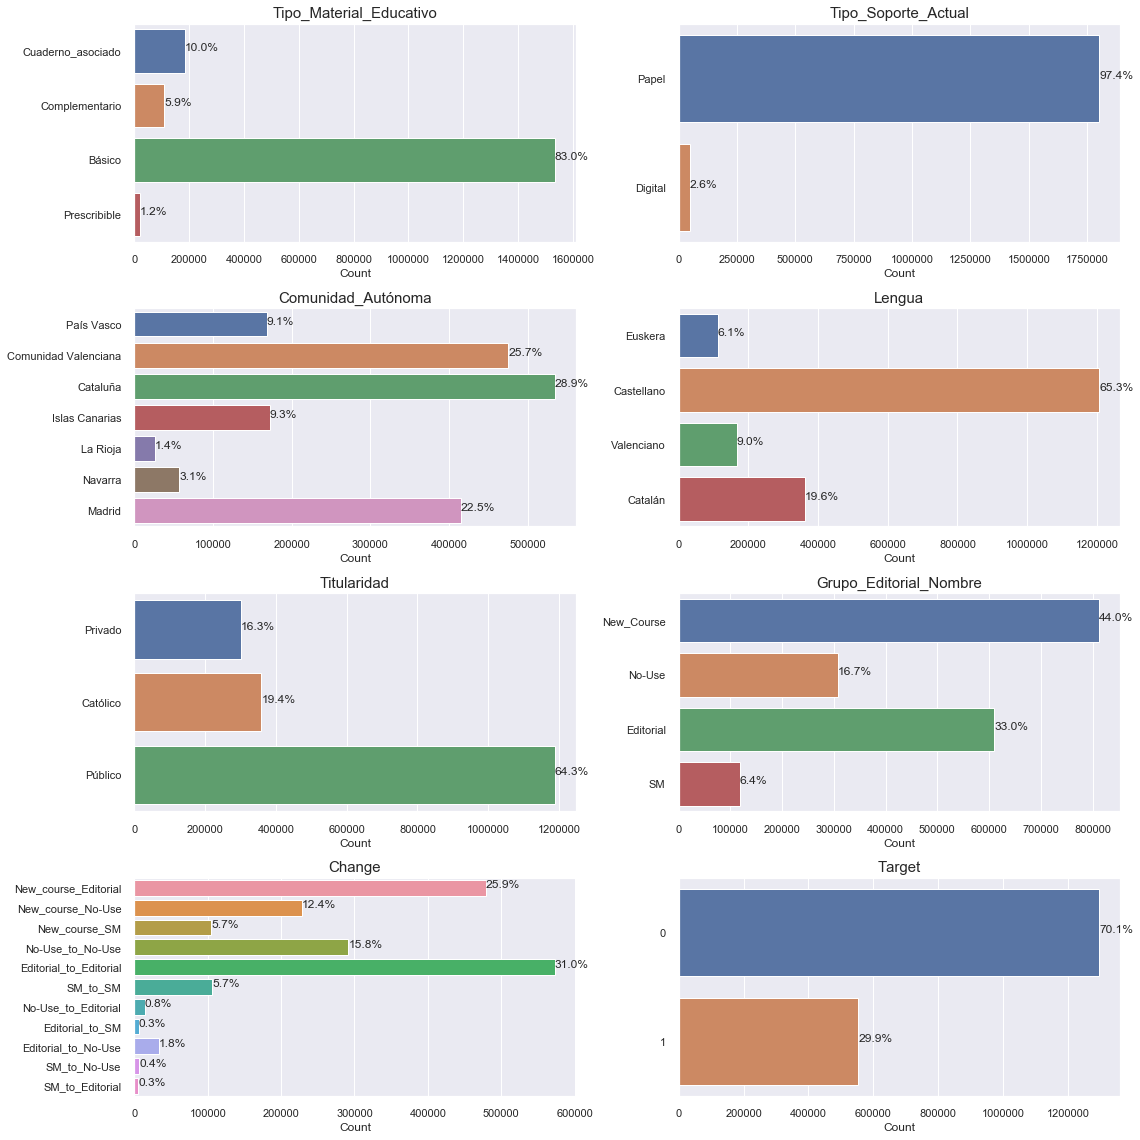

In [51]:
# setting the size of the plots
plt.figure(figsize = (16,16))

plt.subplot(4,2,1)
plt.tight_layout()
ax = sns.countplot(y="Tipo_Material_Educativo", data=AllData)
plt.title('Tipo_Material_Educativo', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Tipo_Material_Educativo'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))

plt.subplot(4,2,2)
plt.tight_layout()
ax = sns.countplot(y = "Tipo_Soporte_Actual", data = AllData)
plt.title('Tipo_Soporte_Actual', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Tipo_Soporte_Actual'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.subplot(4,2,4)
plt.tight_layout()
ax = sns.countplot(y = "Lengua", data = AllData)
plt.title('Lengua', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Lengua'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.subplot(4,2,3)
plt.tight_layout()
ax = sns.countplot(y = "Comunidad_Autónoma", data = AllData)
plt.title('Comunidad_Autónoma', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Comunidad_Autónoma'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.subplot(4,2,5)
plt.tight_layout()
ax = sns.countplot(y = "Titularidad", data = AllData)
plt.title('Titularidad', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Titularidad'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.subplot(4,2,6)
plt.tight_layout()
ax = sns.countplot(y = "Grupo_Editorial_Nombre", data = AllData)
plt.title('Grupo_Editorial_Nombre', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Grupo_Editorial_Nombre'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.subplot(4,2,7)
plt.tight_layout()
ax = sns.countplot(y = "Change", data = AllData)
plt.title('Change', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Change'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.subplot(4,2,8)
plt.tight_layout()
ax = sns.countplot(y = "Target", data = AllData)
plt.title('Target', fontsize = 15)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Target'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

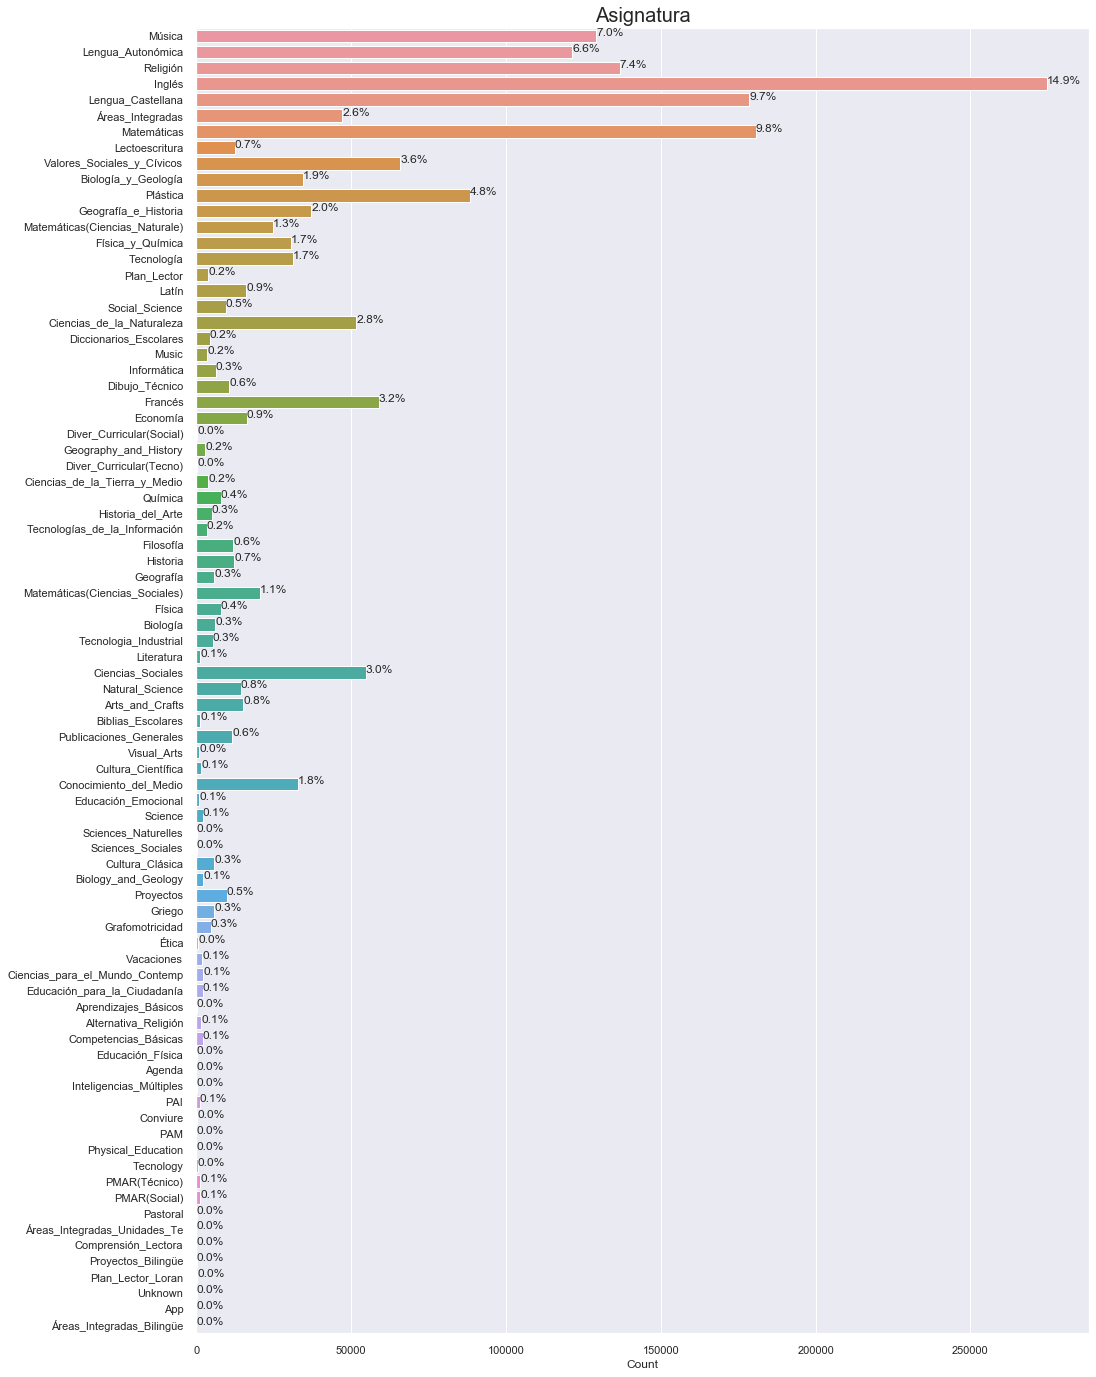

In [52]:
plt.figure(figsize=(16,24))
plt.tight_layout()
ax = sns.countplot(y = "Asignatura", data = AllData)
plt.title('Asignatura', fontsize = 20)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Asignatura'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

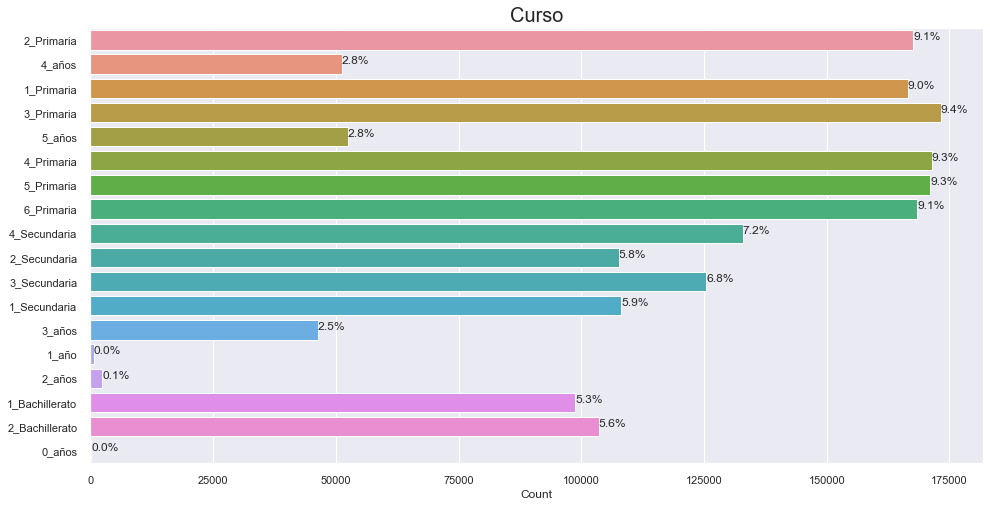

In [53]:
plt.figure(figsize=(16,8))
plt.tight_layout()
ax = sns.countplot(y = "Curso", data = AllData)
plt.title('Curso', fontsize = 20)
plt.xlabel('Count')
plt.ylabel("")
total = len(AllData['Curso'])
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

## Checking for Outliers

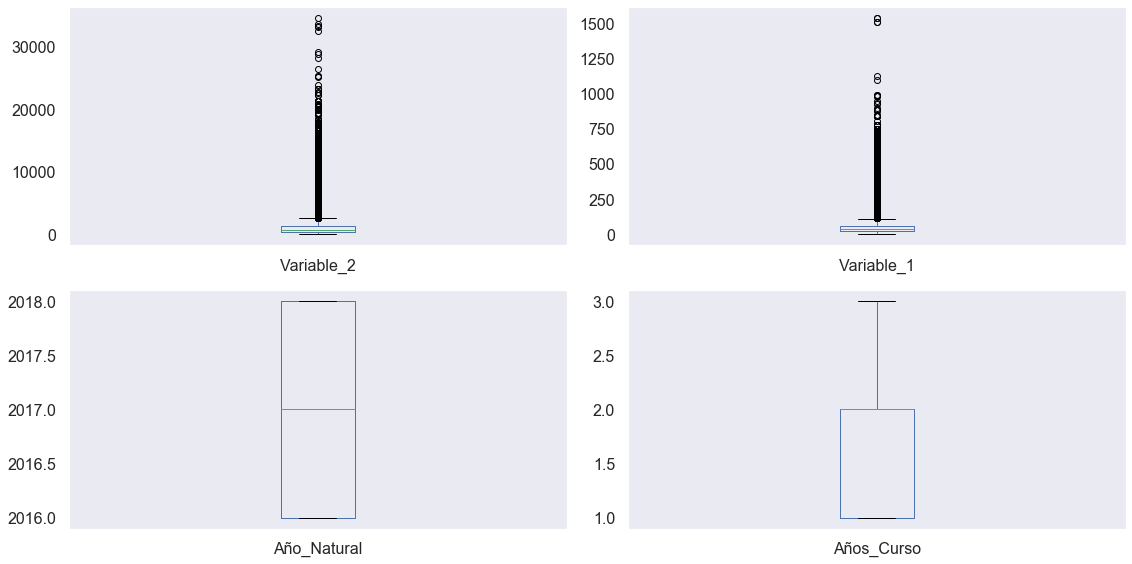

In [54]:
# setting the size of the plots
plt.figure(figsize = (16,8))

# plotting boxplot to check for outliers for Variable_2
plt.subplot(2,2,1)
plt.tight_layout()
AllData.boxplot(["Variable_2"], grid=False, fontsize=16)

# plotting boxplot to check for outliers for Variable_1
plt.subplot(2,2,2)
plt.tight_layout()
AllData.boxplot(["Variable_1"], grid=False, fontsize=16)

# plotting boxplot to check for outliers for Año_Natural
plt.subplot(2,2,3)
plt.tight_layout()
AllData.boxplot(["Año_Natural"], grid=False, fontsize=16)

# plotting boxplot to check for outliers for Años_Curso
plt.subplot(2,2,4)
plt.tight_layout()
AllData.boxplot(["Años_Curso"], grid=False, fontsize=16)

plt.show()

## Obtaining valuable insights

In [55]:
# Checking which schools are repeated the most
AllData["Id_Cliente"].value_counts()

117484    653
185903    648
169293    641
168405    640
137884    635
         ... 
181330      3
136476      3
209859      3
211324      2
204155      2
Name: Id_Cliente, Length: 7994, dtype: int64

In [56]:
# Checking which courses thar are repeated the most
AllData["Curso"].value_counts()

3_Primaria        173207
4_Primaria        171432
5_Primaria        171114
6_Primaria        168457
2_Primaria        167601
1_Primaria        166538
4_Secundaria      132874
3_Secundaria      125468
1_Secundaria      108186
2_Secundaria      107651
2_Bachillerato    103601
1_Bachillerato     98790
5_años             52472
4_años             51226
3_años             46280
2_años              2409
1_año                698
0_años               207
Name: Curso, dtype: int64

In [57]:
# Checking which languages that are most used
AllData["Lengua"].value_counts()

Castellano    1206105
Catalán        362611
Valenciano     166646
Euskera        112849
Name: Lengua, dtype: int64

In [58]:
# Checking which schools have the highest number of potential book purchases
AllData.groupby(["Id_Cliente"])["Variable_1"].sum().sort_values(ascending = False)

Id_Cliente
137878    81971.0
193055    80099.0
136542    76271.0
175016    72339.0
193672    65027.0
           ...   
175492       20.0
181143       20.0
129425       18.0
187472       16.0
167554        3.0
Name: Variable_1, Length: 7994, dtype: float64

In [59]:
# Creating a pivot table to see changes from year to year
pd.pivot_table(AllData, values='Unique_Id', index=['Change'],
               columns=['Año_Natural'], aggfunc= "count", fill_value=0)

Año_Natural,2016,2017,2018
Change,,,
Editorial_to_Editorial,0,286545,286360
Editorial_to_No-Use,0,17570,15483
Editorial_to_SM,0,3051,2915
New_course_Editorial,364326,60701,53926
New_course_No-Use,172621,26463,29335
New_course_SM,75780,15101,14225
No-Use_to_Editorial,0,7614,6626
No-Use_to_No-Use,0,138273,153262
SM_to_Editorial,0,2237,3061


In [60]:
# Creating a pivot table to see the development of classes for each school
pd.pivot_table(AllData, values='Unique_Id', index=['Id_Cliente'],
               columns=['Año_Natural'], aggfunc= "count", fill_value=0)

Año_Natural,2016,2017,2018
Id_Cliente,,,
113956,0,149,145
113958,132,134,128
113960,186,190,0
113962,160,154,138
113963,41,39,39
...,...,...,...
212517,0,0,80
212528,0,0,174
212529,0,0,143


In [61]:
# Checking which schools that creates the biggest revenue
AllData.groupby(["Id_Cliente"])["Variable_2"].sum().sort_values(ascending = False)

Id_Cliente
137878    1621429.54
175016    1515357.57
127136    1500537.75
166643    1430284.35
136542    1410881.37
             ...    
174355        654.01
175492        629.68
129425        546.71
187472        502.48
167554         79.37
Name: Variable_2, Length: 7994, dtype: float64

In [62]:
# Checking which school clssification that creates the biggest revenue
AllData.groupby(["Titularidad"])["Variable_2"].sum()

Titularidad
Católico    3.747902e+08
Privado     2.908143e+08
Público     1.096306e+09
Name: Variable_2, dtype: float64

In [63]:
# Checking which schools that are responsible for the most potential revenue loss
# Creating a dataframe for only rows with target variable set to 1
Target = AllData[AllData["Target"] == 1]
Target.groupby(["Id_Cliente"])["Variable_2"].sum().sort_values(ascending = False)

Id_Cliente
134980    703690.71
134716    683754.10
206405    636067.10
136399    619770.56
133900    604943.79
            ...    
124357        65.17
191514        63.57
172095        39.57
140018        37.88
171775        32.52
Name: Variable_2, Length: 7892, dtype: float64

In [64]:
# Checking which autonomous regions that are responsible for the most potential revenue loss
Target.groupby(["Comunidad_Autónoma"])["Variable_2"].sum().sort_values(ascending = False)

Comunidad_Autónoma
Cataluña                1.508337e+08
Comunidad Valenciana    9.741538e+07
Madrid                  9.414759e+07
País Vasco              5.629054e+07
Islas Canarias          5.215869e+07
Navarra                 1.137268e+07
La Rioja                3.851342e+06
Name: Variable_2, dtype: float64

## Checking Coordinates

In [65]:
# setting our coordinates for the map
coordinates_dict = {}
for i in clientes.Id_Cliente:
    coordinates_dict[i] = list(clientes.loc[clientes.Id_Cliente == i ,['Longitud','Latitud']].values[0])

In [66]:
import mplleaflet
import networkx as nx

cliente = clientes.set_index("Id_Cliente").to_dict("index").items()

# adding school location to an graph object
G = nx.Graph()
G = nx.from_pandas_edgelist(clientes, source = "Id_Cliente",
                                   target = "Id_Cliente",
                                   create_using = nx.Graph)
G.add_nodes_from(cliente)

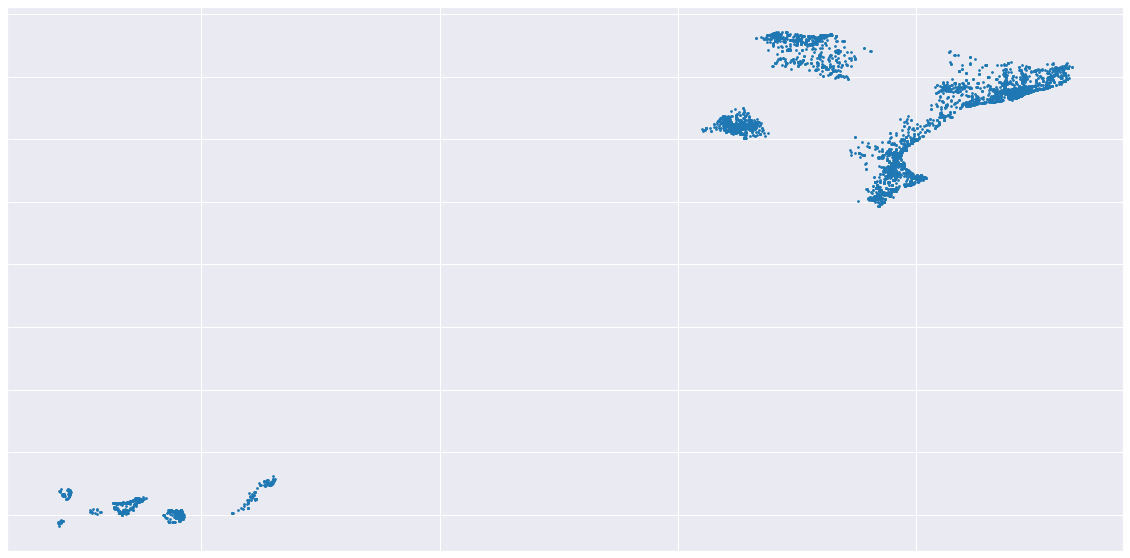

In [67]:
# Plotting the coordinates of the schools. the package "mplleaflet" was not helpful showing it on a map, so it
# only shows the distributions of unique clients
fig, ax = plt.subplots(figsize =(20,10))

nx.draw_networkx_nodes(G, pos = coordinates_dict, node_size = 3)

plt.show()

As mentioned in the introduction of this file, please move on to the document called "DATATHONGROUPD" for the rest of the notebook and modeling